## Execution time error

Data is collected in a way where there is as little randomness as possible (no random loop lengths). This is done to show how transaction execution time error behaves when the execution effort is constant.

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("01032022-execution-time-no-random-transactions.csv")

# group the data by transaction type. Within each type the features should be the same.
# Warning some features still have some variation. I need to check why. Could depend it the transaction is a first transaction or not. As long as it depends on the execution state and not on the state of the execution node (caches) it is ok to use.
groups = data.groupby(['tx'])
groups.describe()

EmitEvent                \
                                                  count     mean  std   
tx                                                                      
add and remove key to/from account                454.0   5917.0  0.0   
add key to account                                448.0   5151.0  0.0   
borrow array from storage                         431.0      3.0  0.0   
call empty contract function                      450.0      3.0  0.0   
convert int to string                             410.0      3.0  0.0   
convert int to string and concatenate it          469.0      3.0  0.0   
copy array from storage                           430.0      3.0  0.0   
copy array from storage and save a duplicate      417.0      3.0  0.0   
create new account                                388.0   2037.0  0.0   
create new account and deploy contract            466.0   1970.0  0.0   
emit event                                        414.0  53395.0  0.0   
get account and get available balance             500.0      3.0  0.0   
get account and get balance                       420.0      3.0  0.0   
get account and get storage capacity              451.0      3.0  0.0   
get account and get storage used                  480.0      3.0  0.0   
get public account                                438.0      3.0  0.0   
get signer address                                440.0      3.0  0.0   
get signer receiver                               437.0      3.0  0.0   
get signer vault                                  454.0      3.0  0.0   
load and save empty string on signers address     438.0      3.0  0.0   
load and save long string on signers address      401.0      3.0  0.0   
mint NFT                                          407.0      3.0  0.0   
reference tx                                      406.0      3.0  0.0   
transfer tokens                                   451.0   8793.0  0.0   

                                                                          \
                                                   min      25%      50%   
tx                                                                         
add and remove key to/from account              5917.0   5917.0   5917.0   
add key to account                              5151.0   5151.0   5151.0   
borrow array from storage                          3.0      3.0      3.0   
call empty contract function                       3.0      3.0      3.0   
convert int to string                              3.0      3.0      3.0   
convert int to string and concatenate it           3.0      3.0      3.0   
copy array from storage                            3.0      3.0      3.0   
copy array from storage and save a duplicate       3.0      3.0      3.0   
create new account                              2037.0   2037.0   2037.0   
create new account and deploy contract          1970.0   1970.0   1970.0   
emit event                                     53395.0  53395.0  53395.0   
get account and get available balance              3.0      3.0      3.0   
get account and get balance                        3.0      3.0      3.0   
get account and get storage capacity               3.0      3.0      3.0   
get account and get storage used                   3.0      3.0      3.0   
get public account                                 3.0      3.0      3.0   
get signer address                                 3.0      3.0      3.0   
get signer receiver                                3.0      3.0      3.0   
get signer vault                                   3.0      3.0      3.0   
load and save empty string on signers address      3.0      3.0      3.0   
load and save long string on signers address       3.0      3.0      3.0   
mint NFT                                           3.0      3.0      3.0   
reference tx                                       3.0      3.0      3.0   
transfer tokens                                 8793.0   8793.0   8793.0   

                     

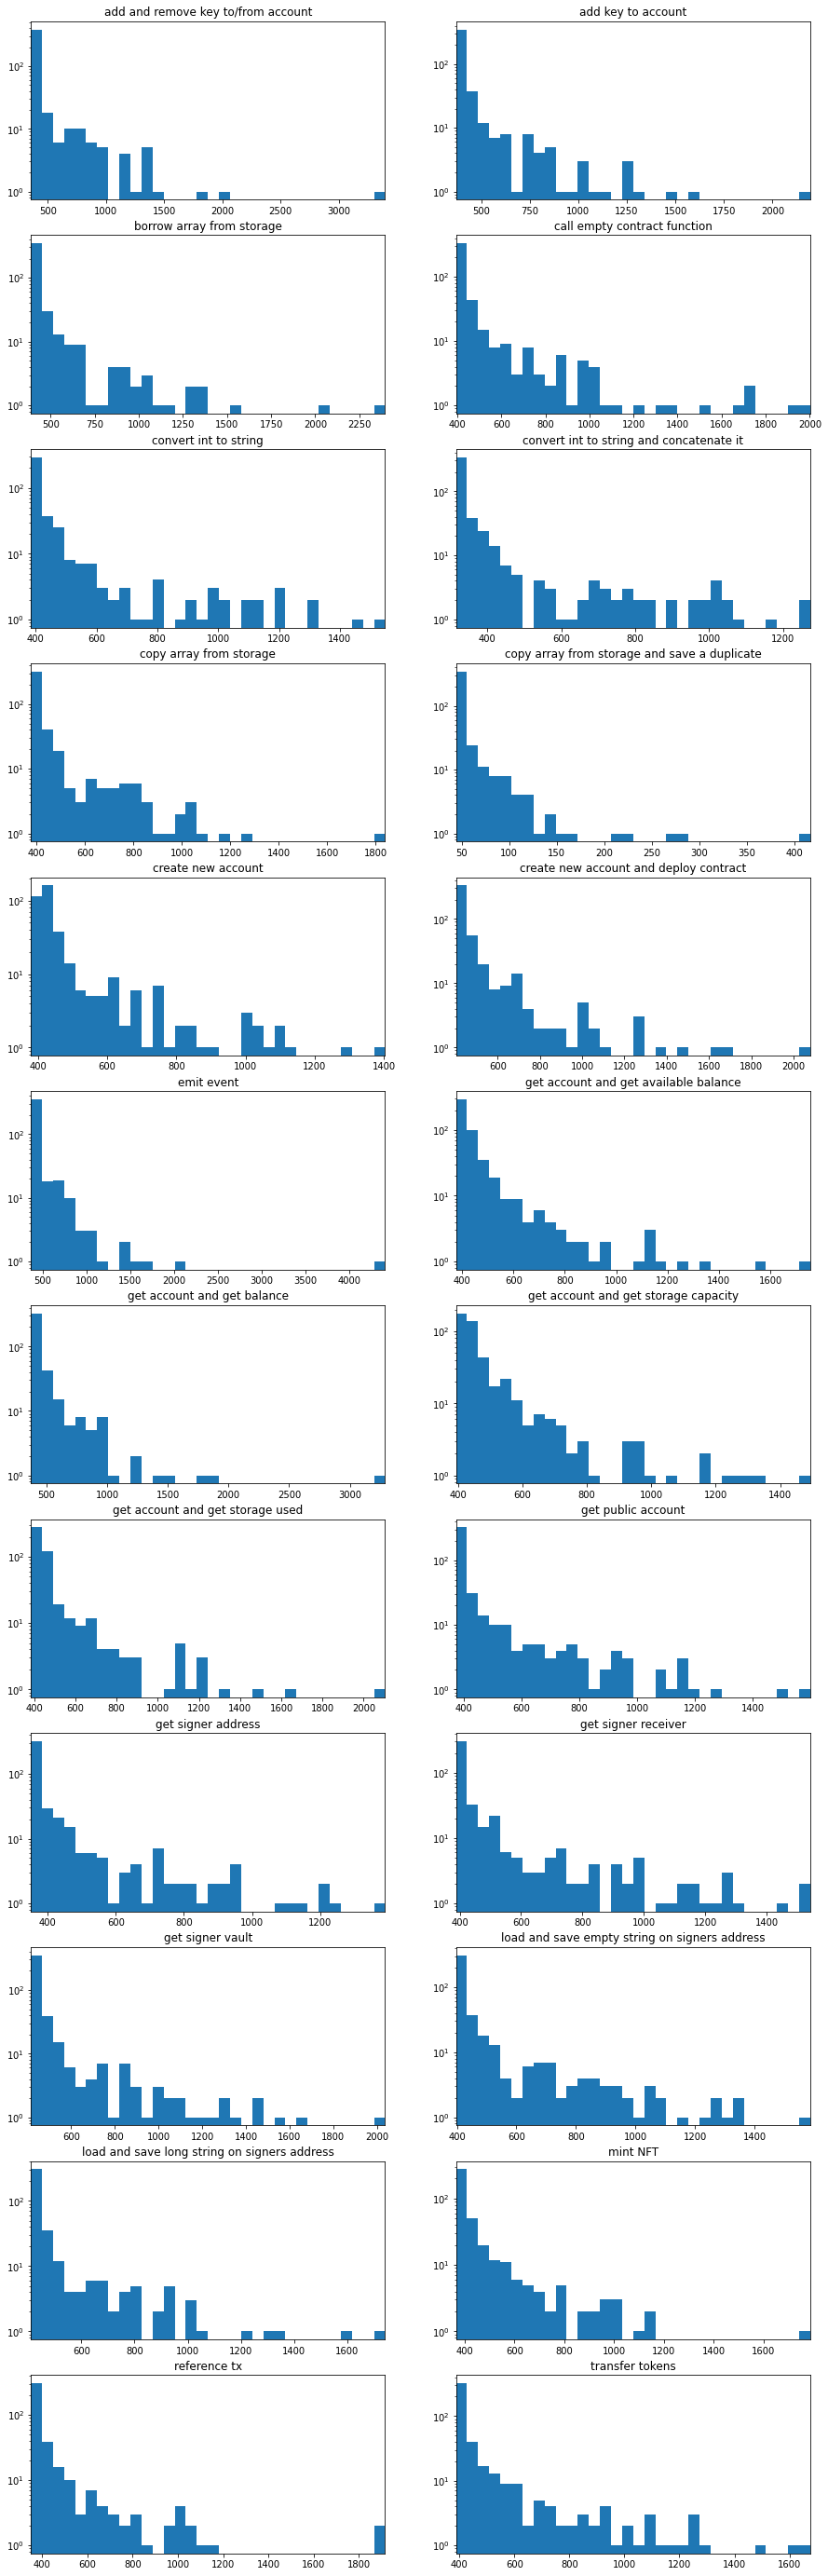

In [45]:
ms_groups = groups['ms']
n = int(len(ms_groups) / 2)
fig, axs = plt.subplots(n, 2, figsize=(15, 50))
i = 0

# plot histograms of execution times per transaction type.
for g in ms_groups:
    gd = g[1]

    max_gd = max(gd)
    min_gd = min(gd)

    ax = axs[int(i / 2)][int(i % 2)]
    ax.hist(gd, bins=32, linewidth=0.5)
    ax.set(xlim=(min_gd, max_gd))
    ax.set_title(g[0])
    ax.set_yscale('log')
    i = i + 1

plt.show()

In [57]:
# get the features with non 0 variance, as they need a special check, that they are deterministic.
gstd = groups.std()
gstd.loc[: , (gstd!=0.0).any()].drop(labels=[
    'ms', # not relevant
    'AllocateStorageIndex', # confirmed deterministic (depends on slab size)
    'ProgramParsed', # removed from collection
    'ValueDecoded', # removed from collection
    'ProgramChecked', # removed from collection
    'GetValue', # must be deterministic
    'SetValue', # must be deterministic
], axis=1)

,SetProgram,GetAccountContractCode,GetCode,ResolveLocation,GetProgram
tx,,,,,
add and remove key to/from account,0.963554,0.963554,0.963554,1.445331,1.445331
add key to account,1.269644,1.269644,1.269644,1.904466,1.904466
borrow array from storage,1.350120,1.350120,1.350120,2.025180,2.025180
call empty contract function,1.177064,1.177064,1.177064,1.765595,1.765595
convert int to string,1.262882,1.262882,1.262882,1.894323,1.894323
convert int to string and concatenate it,1.323511,1.323511,1.323511,1.985266,1.985266
copy array from storage,1.136969,1.136969,1.136969,1.705453,1.705453
copy array from storage and save a duplicate,1.118653,1.118653,1.118653,1.677979,1.677979
create new account,1.194569,1.194569,1.194569,1.791854,1.791854
